/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


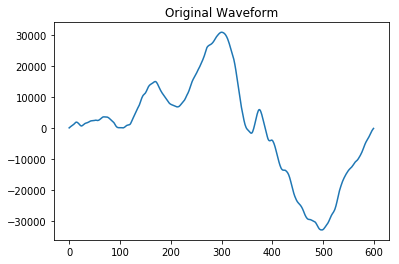

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import scipy as sp
import scipy.signal

spf = wave.open('AKWF_altosax_0001.wav','r')
#Extract Raw Audio from Wav File
#If Stereo
if spf.getnchannels() == 2:
    print('Just mono files')
    sys.exit(0)
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

plt.figure(1)
plt.title('Original Waveform')
plt.plot(signal)
plt.show()

In [107]:
def num_samples_required(clk_f, target_f):
    return int(clk_f/target_f + 0.5)

In [108]:
clk = 32 * 10**6

for mck_rate in [clk/2, clk/3, clk/4, clk/5, clk/6, clk/8, clk/10, clk/11, clk/15, clk/16, clk/21, clk/23, clk/31, clk/42, clk/63, clk/125]:
    for ratio in [32, 48, 64, 96, 128, 192, 256, 384, 512]:
        for n in range(1, 10001):
            if (abs(mck_rate/ratio - 246.9417*n) <= 100):
                print("MCK =", mck_rate, "Ratio =", ratio, "n =", n, 'LRCK rate =', mck_rate/ratio, 'Hz')

MCK = 16000000.0 Ratio = 32 n = 2025 LRCK rate = 500000.0 Hz
MCK = 16000000.0 Ratio = 48 n = 1350 LRCK rate = 333333.3333333333 Hz
MCK = 16000000.0 Ratio = 64 n = 1012 LRCK rate = 250000.0 Hz
MCK = 16000000.0 Ratio = 96 n = 675 LRCK rate = 166666.66666666666 Hz
MCK = 16000000.0 Ratio = 128 n = 506 LRCK rate = 125000.0 Hz
MCK = 16000000.0 Ratio = 256 n = 253 LRCK rate = 62500.0 Hz
MCK = 16000000.0 Ratio = 384 n = 169 LRCK rate = 41666.666666666664 Hz
MCK = 10666666.666666666 Ratio = 32 n = 1350 LRCK rate = 333333.3333333333 Hz
MCK = 10666666.666666666 Ratio = 48 n = 900 LRCK rate = 222222.22222222222 Hz
MCK = 10666666.666666666 Ratio = 64 n = 675 LRCK rate = 166666.66666666666 Hz
MCK = 10666666.666666666 Ratio = 96 n = 450 LRCK rate = 111111.11111111111 Hz
MCK = 10666666.666666666 Ratio = 192 n = 225 LRCK rate = 55555.555555555555 Hz
MCK = 10666666.666666666 Ratio = 256 n = 169 LRCK rate = 41666.666666666664 Hz
MCK = 10666666.666666666 Ratio = 512 n = 84 LRCK rate = 20833.333333333332 H

In [109]:
notes_to_frequencies = {'B3': 246.9417,
                        'C4': 261.6256,
                        'D4_FLAT': 277.1826, 
                        'D4': 293.6648,
                        'E4_FLAT': 311.1270,
                        'E4': 329.6276,
                        'F4': 349.2282,
                        'G4_FLAT': 369.9944,
                        'G4': 391.9954,
                        'A4_FLAT': 415.3047,
                        'A4': 440.0000,
                        'B4_FLAT': 466.1638,
                        'B4': 493.8833,
                        'C5': 523.2511,
                        'D5_FLAT': 554.3653,
                        'D5': 587.3295,
                        'E5_FLAT': 622.2540,
                        'E5': 659.2551,
                        'F5': 698.4565,
                        'G5_FLAT': 739.9888,
                        'G5': 783.9909,
                        'A5_FLAT': 830.6094,
                        'A5': 880.0000,
                        'B5_FLAT': 932.3275,
                        'B5': 987.7666,
                        'C6': 1046.502
                       }

clk_hz = 90909.1

In [110]:
def generate_note_array(note, waveform, i2s_clock_frequency_hz):
    n = num_samples_required(i2s_clock_frequency_hz, notes_to_frequencies[note])
    new_signal = sp.signal.resample(waveform, n)
    return [int(x/2) for x in new_signal]

In [111]:
def initializer_list_for_c(signal):
    result = []
    result.append('{')
    for x in signal[:-1]:
        result.append(str(x))
        result.append(', ')
    result.append(str(signal[-1]))
    result.append('}')
    return ''.join(result)

def generate_soundboard_header_file(waveform):
    soundboard_header_file = '''#define B3_LENGTH {}
#define C4_LENGTH {}
#define D4_FLAT_LENGTH {}
#define D4_LENGTH {}
#define E4_FLAT_LENGTH {}
#define E4_LENGTH {}
#define F4_LENGTH {}
#define G4_FLAT_LENGTH {}
#define G4_LENGTH {}
#define A4_FLAT_LENGTH {}
#define A4_LENGTH {}
#define B4_FLAT_LENGTH {}
#define B4_LENGTH {}
#define C5_LENGTH {}
#define D5_FLAT_LENGTH {}
#define D5_LENGTH {}
#define E5_FLAT_LENGTH {}
#define E5_LENGTH {}
#define F5_LENGTH {}
#define G5_FLAT_LENGTH {}
#define G5_LENGTH {}
#define A5_FLAT_LENGTH {}
#define A5_LENGTH {}
#define B5_FLAT_LENGTH {}
#define B5_LENGTH {}
#define C6_LENGTH {}
#define NO_NOTE_LENGTH 2

static int16_t B3_array[B3_LENGTH] = {};
static int16_t C4_array[C4_LENGTH] = {};
static int16_t D4_FLAT_array[D4_FLAT_LENGTH] = {};
static int16_t D4_array[D4_LENGTH] = {};
static int16_t E4_FLAT_array[E4_FLAT_LENGTH] = {};
static int16_t E4_array[E4_LENGTH] = {};
static int16_t F4_array[F4_LENGTH] = {};
static int16_t G4_FLAT_array[G4_FLAT_LENGTH] = {};
static int16_t G4_array[G4_LENGTH] = {};
static int16_t A4_FLAT_array[A4_FLAT_LENGTH] = {};
static int16_t A4_array[A4_LENGTH] = {};
static int16_t B4_FLAT_array[B4_FLAT_LENGTH] = {};
static int16_t B4_array[B4_LENGTH] = {};
static int16_t C5_array[C5_LENGTH] = {};
static int16_t D5_FLAT_array[D5_FLAT_LENGTH] = {};
static int16_t D5_array[D5_LENGTH] = {};
static int16_t E5_FLAT_array[E5_FLAT_LENGTH] = {};
static int16_t E5_array[E5_LENGTH] = {};
static int16_t F5_array[F5_LENGTH] = {};
static int16_t G5_FLAT_array[G5_FLAT_LENGTH] = {};
static int16_t G5_array[G5_LENGTH] = {};
static int16_t A5_FLAT_array[A5_FLAT_LENGTH] = {};
static int16_t A5_array[A5_LENGTH] = {};
static int16_t B5_FLAT_array[B5_FLAT_LENGTH] = {};
static int16_t B5_array[B5_LENGTH] = {};
static int16_t C6_array[C6_LENGTH] = {};
static int16_t NO_NOTE_array[NO_NOTE_LENGTH] = {{0, 0}};
'''
    
    lengths = []
    waves = []
    
    for note in notes_to_frequencies:
        new_signal = generate_note_array(note, waveform, clk_hz)
        lengths.append(str(len(new_signal)))
        waves.append(initializer_list_for_c(new_signal))
    
    values = lengths + waves
    return soundboard_header_file.format(*values)

In [105]:
s = generate_soundboard_header_file(signal)
f = open('software/apps/happy_hands/sax.h', 'w')
f.write(s)
f.close()